In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from seaborn import lineplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn import svm

In [2]:
personnel_df = pd.read_csv("russia_losses_personnel.csv")

In [3]:
personnel_df.head()

date  day  personnel personnel*  POW
0  2024-06-09  837     518560      about  NaN
1  2024-06-08  836     517290      about  NaN
2  2024-06-07  835     516080      about  NaN
3  2024-06-06  834     515000      about  NaN
4  2024-06-05  833     513700      about  NaN

In [4]:
personnel_df.drop('personnel*', axis=1, inplace=True)

In [5]:
personnel_df.drop('POW', axis=1, inplace=True)

In [6]:
personnel_df['date'] = pd.to_datetime(personnel_df['date'])

In [7]:
personnel_df['year'] = personnel_df['date'].dt.year
personnel_df['month'] = personnel_df['date'].dt.month
personnel_df['combat_date'] = personnel_df['date'].dt.day

In [8]:
personnel_df.drop(columns=['date'], inplace=True)

In [9]:
personnel_df.rename(columns={'day': 'combat_day'}, inplace=True)

In [10]:
personnel_df.rename(columns={'combat_date': 'day'}, inplace=True)

In [11]:
personnel_df.head()

combat_day  personnel  year  month  day
0         837     518560  2024      6    9
1         836     517290  2024      6    8
2         835     516080  2024      6    7
3         834     515000  2024      6    6
4         833     513700  2024      6    5

In [12]:
personnel_df['personnel_change'] = personnel_df['personnel'].diff()

In [13]:
personnel_df.head()

combat_day  personnel  year  month  day  personnel_change
0         837     518560  2024      6    9               NaN
1         836     517290  2024      6    8           -1270.0
2         835     516080  2024      6    7           -1210.0
3         834     515000  2024      6    6           -1080.0
4         833     513700  2024      6    5           -1300.0

In [14]:
personnel_df.fillna(0, inplace=True)

In [15]:
personnel_df.dtypes

combat_day            int64
personnel             int64
year                  int64
month                 int64
day                   int64
personnel_change    float64
dtype: object

In [16]:
personnel_df.mean()

combat_day             419.500000
personnel           200500.017943
year                  2022.821770
month                    6.215311
day                     15.685407
personnel_change      -616.937799
dtype: float64

In [17]:
personnel_df['personnel_change'] = personnel_df['personnel_change'].astype('int64')

<Axes: xlabel='combat_day', ylabel='personnel_change'>

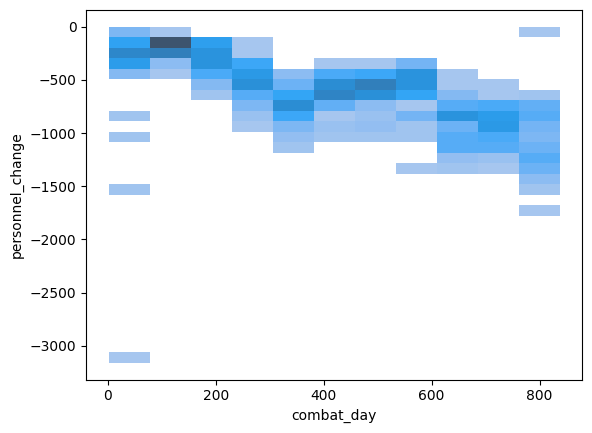

In [18]:
sns.histplot(data=personnel_df, x='combat_day', y='personnel_change')

<Axes: xlabel='combat_day', ylabel='personnel_change'>

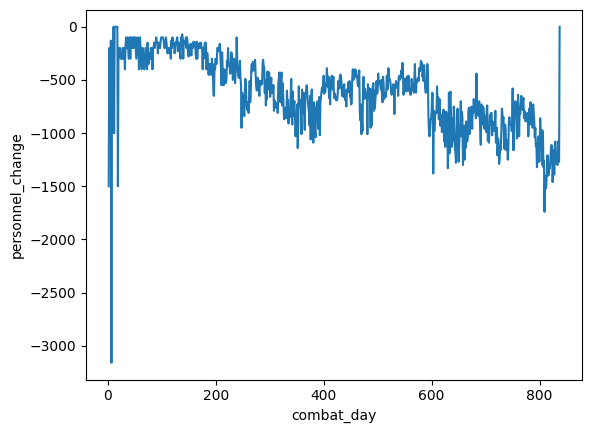

In [19]:
sns.lineplot(data=personnel_df,x='combat_day',y='personnel_change')

<Axes: xlabel='combat_day', ylabel='personnel_change'>

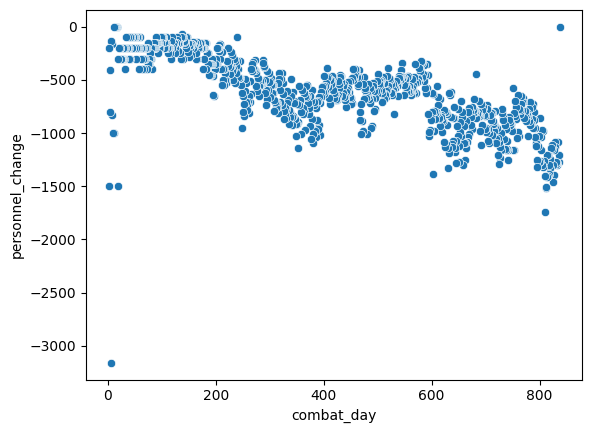

In [20]:
sns.scatterplot(data=personnel_df, x='combat_day', y='personnel_change')

In [21]:
null_values =  personnel_df.isnull()
null_true = null_values.sum().sum()
null_false = null_values.size - null_true
list_of_null = f"{null_true} True and {null_false} False"
print (list_of_null)

0 True and 5016 False


In [22]:
y = personnel_df['personnel_change']
X = personnel_df.drop(columns=['personnel_change'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(y.shape, y_train.shape, y_test.shape)

(836,) (668,) (168,)


In [25]:
neural_model = MLPRegressor()

In [26]:
neural_model.fit(X_train,y_train)

MLPRegressor()

In [27]:
neural_model.score(X_test,y_test)

0.5991115778812584

In [28]:
random_forest_model = RandomForestRegressor()

In [29]:
random_forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
random_forest_model.score(X_test,y_test)

0.6177666746214485

In [31]:
logical_model = LogisticRegression(max_iter=100)

In [32]:
logical_model.fit(X_train,y_train)

C:\Users\nille\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
logical_model.score(X_test,y_test)

0.08333333333333333

In [34]:
liner_model = LinearRegression()

In [35]:
liner_model.fit(X_train,y_train)

LinearRegression()

In [36]:
liner_model.score(X_test,y_test)

0.6900055936283123

In [37]:
predictions = neural_model.predict(X_test)
ame = mean_absolute_error(y_test,predictions)
print("Absolute Mean Error:", ame)

Absolute Mean Error: 168.38482303363986


In [38]:
predictions_2 = random_forest_model.predict(X_test)
ame_2 = mean_absolute_error(y_test,predictions_2)
print("Absolute Mean Error:", ame_2)

Absolute Mean Error: 116.62011904761906


In [39]:
predictions_3 = logical_model.predict(X_test)
ame_3 = mean_absolute_error(y_test,predictions_3)
print("Absolute Mean Error:", ame_3)

Absolute Mean Error: 189.01785714285714


In [40]:
predictions_4 = liner_model.predict(X_test)
ame_4 = mean_absolute_error(y_test,predictions_4)
print("Absolute Mean Error:", ame_4)

Absolute Mean Error: 152.80457329452923


In [41]:
neural_model = pd.DataFrame (data= {'real values': y_test,
                              'predicted  vaules': predictions})
neural_model['difference'] = neural_model['predicted  vaules'] - neural_model['real values']
neural_model

real values  predicted  vaules  difference
611         -380        -368.937350   11.062650
823            0        -421.084630 -421.084630
290         -470        -682.813969 -212.813969
801         -200        -305.158161 -105.158161
168         -760        -830.654437  -70.654437
..           ...                ...         ...
653         -250        -344.080648  -94.080648
456        -1090        -520.623437  569.376563
778         -200        -309.179469 -109.179469
532         -550        -435.228575  114.771425
478        -1010        -494.575012  515.424988

[168 rows x 3 columns]

In [42]:
random_forest_model = pd.DataFrame (data= {'real values': y_test,
                              'predicted  vaules': predictions_2})
random_forest_model['difference'] = random_forest_model['predicted  vaules'] - random_forest_model['real values']
random_forest_model

real values  predicted  vaules  difference
611         -380             -377.2         2.8
823            0             -120.0      -120.0
290         -470             -570.8      -100.8
801         -200             -177.0        23.0
168         -760             -881.2      -121.2
..           ...                ...         ...
653         -250             -337.5       -87.5
456        -1090             -907.7       182.3
778         -200             -274.0       -74.0
532         -550             -614.1       -64.1
478        -1010             -747.1       262.9

[168 rows x 3 columns]

In [43]:
y_pred = liner_model.predict(X_test)

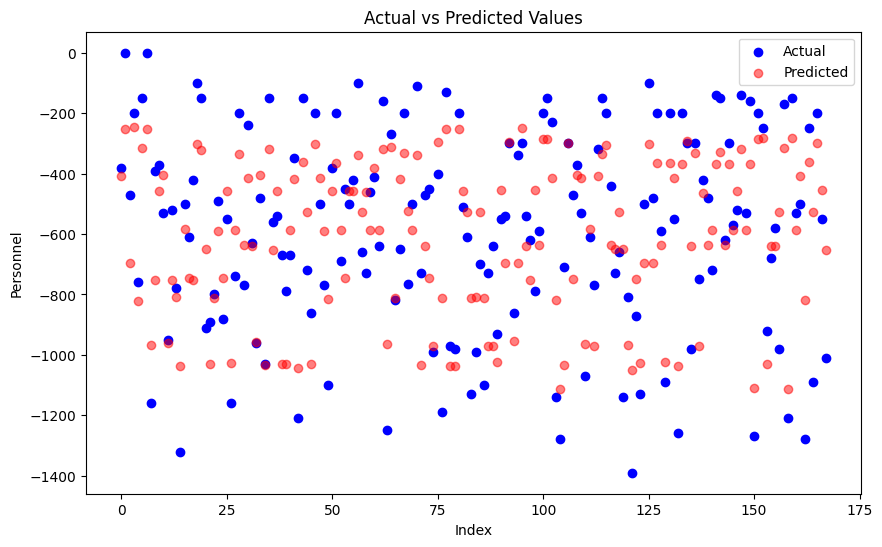

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Personnel')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [45]:
y_pred_2 = logical_model.predict(X_test)

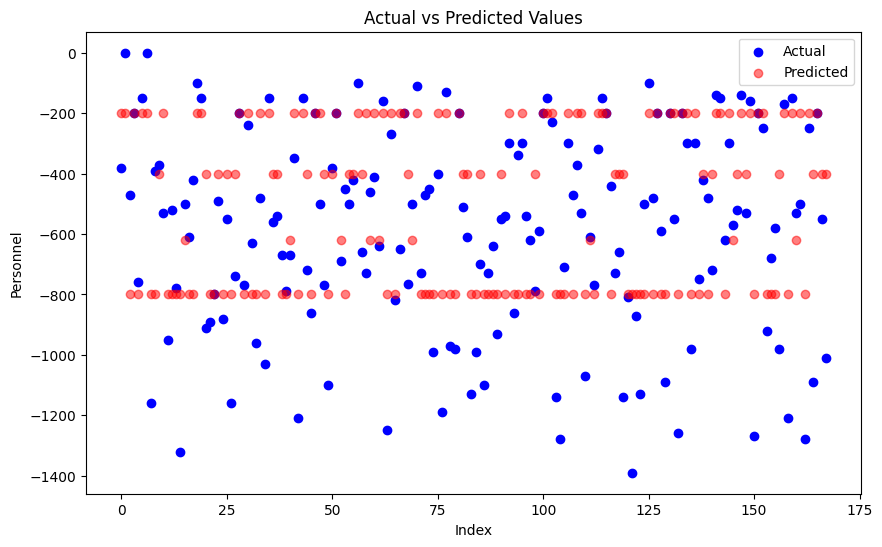

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_2)), y_pred_2, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Personnel')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [47]:
y_pred_3 = liner_model.predict(X_test)

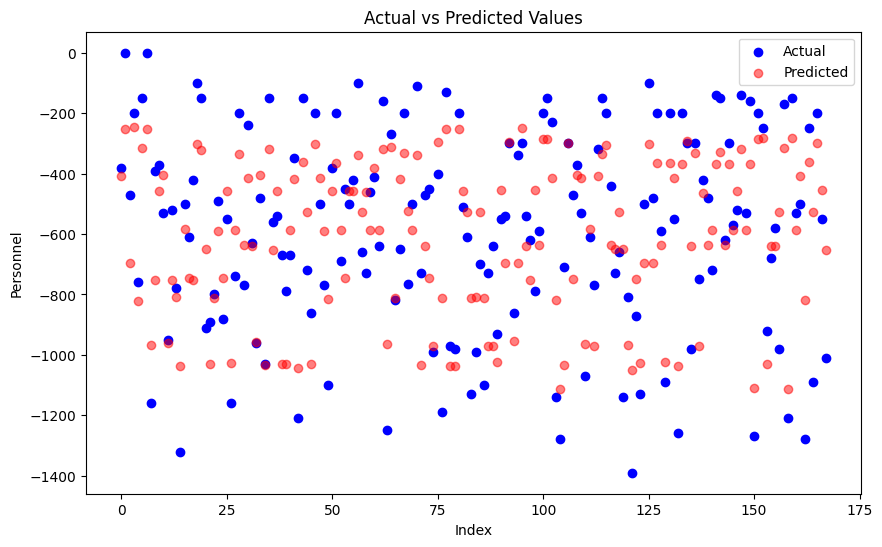

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_3)), y_pred_3, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Personnel')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()